In [1]:
import json
import requests
from bs4 import BeautifulSoup

# Load Login Credentials

In [2]:
with open('credentials.json', 'r') as f:
    credentials = json.load(f)
    username = credentials['USERNAME']
    password = credentials['PASSWORD']
    
URL = 'https://www.mytwinoaks.com/MemberPortal/Login.aspx?clubid=1699'
headers={"User-Agent":"Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/43.0.2357.125 Safari/537.36"}

# Start Session and Login

In [3]:
print("Getting:", URL)
s=requests.Session()
s.headers.update(headers)

r=s.get(URL)
soup=BeautifulSoup(r.content)

VIEWSTATE=soup.find(id="__VIEWSTATE")['value']
VIEWSTATEGENERATOR=soup.find(id="__VIEWSTATEGENERATOR")['value']
EVENTVALIDATION=soup.find(id="__EVENTVALIDATION")['value']

data={"__VIEWSTATE":VIEWSTATE,
"__VIEWSTATEGENERATOR":VIEWSTATEGENERATOR,
"__EVENTVALIDATION":EVENTVALIDATION,
"ctl00$PageContent$LoginName":username,
"ctl00$PageContent$PassWord":password,
"ctl00$PageContent$loginButton":"Log In"}

r = s.post(URL, data)
URL = r.url
soup = BeautifulSoup(r.content)
print("Returned:",URL)

Getting: https://www.mytwinoaks.com/MemberPortal/Login.aspx?clubid=1699
Returned: https://www.mytwinoaks.com/MemberPortal/ClubServices/memDashboard.aspx?clubid=1699


# Get a history of visits

## Navigate to Usage Page

In [4]:
VIEWSTATE=soup.find(id="__VIEWSTATE")['value']
VIEWSTATEGENERATOR=soup.find(id="__VIEWSTATEGENERATOR")['value']
EVENTVALIDATION=soup.find(id="__EVENTVALIDATION")['value']

data = {"__VIEWSTATE":VIEWSTATE,
        "__VIEWSTATEGENERATOR":VIEWSTATEGENERATOR,
        "__VIEWSTATEENCRYPTED":"",
        "__EVENTVALIDATION":EVENTVALIDATION,
        "ctl00$IsLoggedIn":1,
        "ctl00$PageContent$amtToPayPopupBox":0,
        "__EVENTTARGET":"ctl00$PageSubNavBar$UsageButton",
        "__EVENTARGUMENT":""
       }

print("Getting:", URL)
r = s.post(URL, data)
URL = r.url
soup = BeautifulSoup(r.content)
print("Returned:",URL)

Getting: https://www.mytwinoaks.com/MemberPortal/ClubServices/memDashboard.aspx?clubid=1699
Returned: https://www.mytwinoaks.com/MemberPortal/ClubServices/memDashboard.aspx?clubid=1699


## Open Printable View of Usage

In [5]:
#First, trigger the ability to GET

VIEWSTATE=soup.find(id="__VIEWSTATE")['value']
VIEWSTATEGENERATOR=soup.find(id="__VIEWSTATEGENERATOR")['value']
EVENTVALIDATION=soup.find(id="__EVENTVALIDATION")['value']

data = {"__VIEWSTATE":VIEWSTATE,
        "__VIEWSTATEGENERATOR":VIEWSTATEGENERATOR,
        "__VIEWSTATEENCRYPTED":"",
        "__EVENTVALIDATION":EVENTVALIDATION,
        "ctl00$IsLoggedIn":1,
        "ctl00$PageContent$fromDateBox":"",
        "ctl00$PageContent$toDateBox:":"",
        "ctl00$PageContent$amtToPayPopupBox":0,
        "__EVENTTARGET":"ctl00$PageContent$usePrintableLink",
        "__EVENTARGUMENT":""
       }

print("Getting:", URL)
r = s.post(URL, data)
URL = r.url
soup = BeautifulSoup(r.content)
print("Returned:",URL)

Getting: https://www.mytwinoaks.com/MemberPortal/ClubServices/memDashboard.aspx?clubid=1699
Returned: https://www.mytwinoaks.com/MemberPortal/ClubServices/memDashboard.aspx?clubid=1699


## Record Data

In [6]:
checkins = s.get("https://www.mytwinoaks.com/MemberPortal/ClubServices/MemberUsageReport.aspx")

with open('Checkins.html', 'w') as w:
    w.write(checkins.text)

# Get a history of payments

## Naviate to the payment page

In [7]:
VIEWSTATE=soup.find(id="__VIEWSTATE")['value']
VIEWSTATEGENERATOR=soup.find(id="__VIEWSTATEGENERATOR")['value']
EVENTVALIDATION=soup.find(id="__EVENTVALIDATION")['value']

data = {"__VIEWSTATE":VIEWSTATE,
        "__VIEWSTATEGENERATOR":VIEWSTATEGENERATOR,
        "__VIEWSTATEENCRYPTED":"",
        "__EVENTVALIDATION":EVENTVALIDATION,
        "ctl00$IsLoggedIn":1,
        "ctl00$PageContent$amtToPayPopupBox":0,
        "__EVENTTARGET":"ctl00$PageSubNavBar$ARHistoryButton",
        "__EVENTARGUMENT":""
       }

print("Getting:", URL)
r = s.post(URL, data)
URL = r.url
soup = BeautifulSoup(r.content)
print("Returned:",URL)

Getting: https://www.mytwinoaks.com/MemberPortal/ClubServices/memDashboard.aspx?clubid=1699
Returned: https://www.mytwinoaks.com/MemberPortal/ClubServices/memDashboard.aspx?clubid=1699


## Open printable view of Payments

In [8]:
VIEWSTATE=soup.find(id="__VIEWSTATE")['value']
VIEWSTATEGENERATOR=soup.find(id="__VIEWSTATEGENERATOR")['value']
EVENTVALIDATION=soup.find(id="__EVENTVALIDATION")['value']

data = {"__VIEWSTATE":VIEWSTATE,
        "__VIEWSTATEGENERATOR":VIEWSTATEGENERATOR,
        "__VIEWSTATEENCRYPTED":"",
        "__EVENTVALIDATION":EVENTVALIDATION,
        "ctl00$IsLoggedIn":1,
        "ctl00$PageContent$fromDateBoxAR":"",
        "ctl00$PageContent$toDateBoxAR:":"",
        "ctl00$PageContent$amtToPayPopupBox":0,
        "__EVENTTARGET":"ctl00$PageContent$ARPrintableLink",
        "__EVENTARGUMENT":""
       }

print("Getting:", URL)
r = s.post(URL, data)
URL = r.url
soup = BeautifulSoup(r.content)
print("Returned:",URL)

Getting: https://www.mytwinoaks.com/MemberPortal/ClubServices/memDashboard.aspx?clubid=1699
Returned: https://www.mytwinoaks.com/MemberPortal/ClubServices/memDashboard.aspx?clubid=1699


## Record Data

In [9]:
payments = s.get("https://www.mytwinoaks.com/MemberPortal/ClubServices/ARHistoryReport.aspx")

with open('Payments.html', 'w') as w:
    w.write(payments.text)

# Scrape Downloaded Data

In [10]:
import datetime
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

In [15]:
#Checkins
with open('Checkins.html', 'r') as f:
    soup = BeautifulSoup(f)

df = {'club':[],'time':[]}
for record in [rec for rec in soup.find_all('tr') if len(rec.find_all('span'))==5]:
    club, _, time, _, alerts = [rec.text for rec in record.find_all('span')]
    df['club'].append(club)
    df['time'].append(datetime.datetime.strptime(time, '%m/%d/%Y %I:%M:%S %p'))
    
df = pd.DataFrame(df)
df['club'] = pd.Categorical(df['club'])
data_visits = df['time']

In [16]:
#Payments
with open('Payments.html', 'r') as f:
    soup = BeautifulSoup(f)

df = {'date':[],'debit':[]}
for record in [rec for rec in soup.find_all('tr') if len(rec.find_all('span'))==11]:
    info = [rec.text for rec in record.find_all('span')]
    date = info[0]
    debit = info[6]
    df['date'].append(datetime.datetime.strptime(date, '%m/%d/%Y'))
    df['debit'].append(float(debit))
    
df = pd.DataFrame(df)
data_payments = df

# Fun with data!

In [17]:
total_payments = data_payments['debit'].sum()
total_visits = len(data_visits)
print('Total Payments:', '${0:,.2f}'.format(total_payments))
print('Total Visits:', '{0:,}'.format(total_visits))
print('Average cost per visit:', "${0:,.2f}".format(total_payments/total_visits))

Total Payments: $1,960.00
Total Visits: 960
Average cost per visit: $2.04


# Fun with plots!

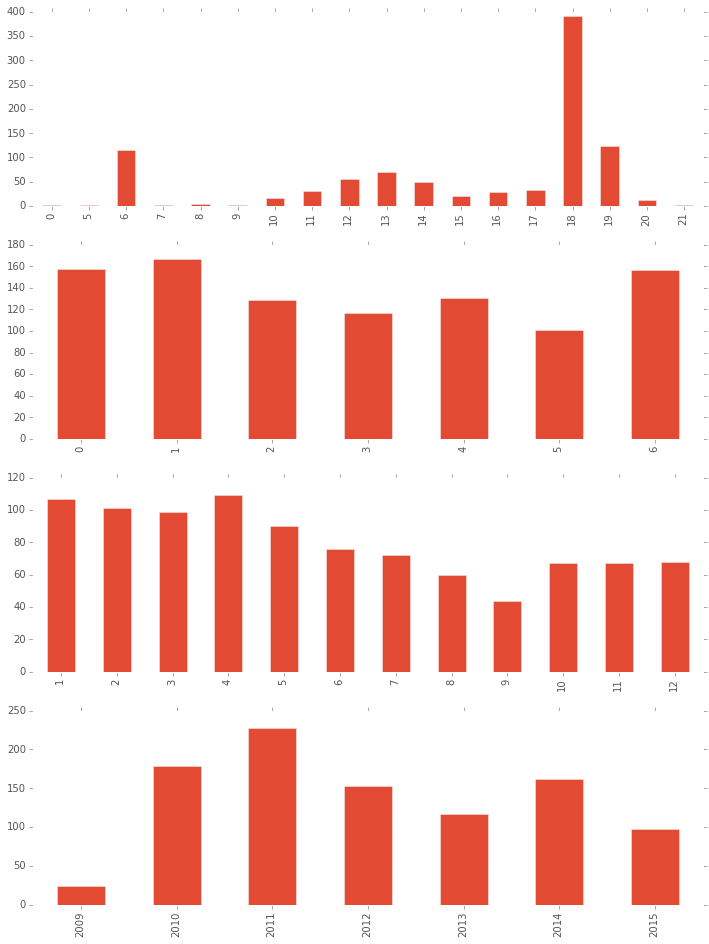

In [18]:
fig,ax = plt.subplots(4, figsize=(12,16))

#Hour
data_visits.groupby(data_visits.dt.hour).count().plot(kind="bar", ax=ax[0])
#Day of the Week
data_visits.groupby(data_visits.dt.weekday).count().plot(kind="bar", ax=ax[1])
#Month
data_visits.groupby(data_visits.dt.month).count().plot(kind="bar", ax=ax[2])
#Year
data_visits.groupby(data_visits.dt.year).count().plot(kind="bar", ax=ax[3])